### Truncated SVD 
- Inspect how many components we should reduce the dimensions of doc-to-term matrix into

In [3]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pickle
from scipy.sparse import csr_matrix

%matplotlib inline

In [4]:
# import the dataframe
with open('../data/doc_words_novel.pkl','rb') as fin:
    doc_word = pickle.load(fin)

In [5]:
# number of components
n = 20

In [6]:
# Truncated SVD for dtm matrix (sparse matrix)
svd_ori = TruncatedSVD(n)  # Decompose dtm features into 15 components
doc_word = csr_matrix(doc_word)
projected = svd_ori.fit_transform(doc_word)
print('Dimension before decomposition: ',doc_word.shape)
print('Dimension after decomposition : ',projected.shape)

Dimension before decomposition:  (1555, 1605962)
Dimension after decomposition :  (1555, 20)


In [7]:
# Collect the %-variance explained
ori_sum_exvar = sum(svd_ori.explained_variance_)
ori_exp_var = [(each/ori_sum_exvar) for each in svd_ori.explained_variance_]

In [8]:
ori_sum_exvar

0.051796245287152126

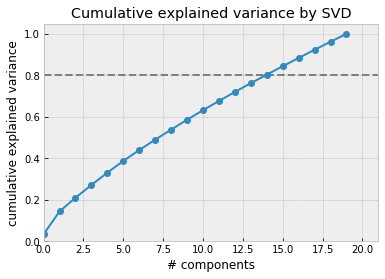

In [9]:
# Plot the variance explained

plt.style.use('bmh')
plt.plot(np.cumsum(ori_exp_var), 'o-')
# plt.plot(np.cumsum(ori_sum_exvar), 'o-')
plt.xlabel('# components')
plt.ylabel('cumulative explained variance');
plt.title('Cumulative explained variance by SVD')
plt.xlim((0,n+1))
plt.ylim((0,plt.ylim()[1]))
plt.hlines(0.8, plt.xlim()[0], plt.xlim()[1], linestyles='dashed',colors='gray');
# plt.vlines(9, 0,0.8, linestyles='dashed',colors='gray')
# plt.savefig('../docs/figures/SVDexplainedVariance.png',transparent=True);

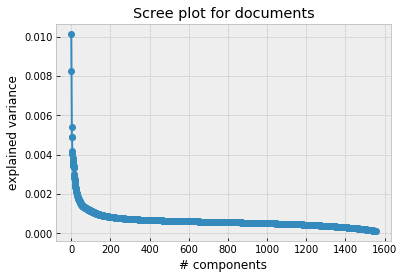

In [32]:
# Scree plot 
plt.plot(ori_exp_var, 'o-')
plt.xlabel('# components')
plt.ylabel('explained variance');
plt.title('Scree plot for documents');
# plt.savefig('../docs/figures/SVDscreeplot.png',transparent=True)

Note: 
- Nine components capture about 80% of the variance explained 

---